In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, precision_recall_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Ridge

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer as imp

from lineartree import LinearForestClassifier

from ModelTree import ModelTree

In [3]:
### GENERATE SAMPLE DATA ###

dataset = pd.read_csv('cleve.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, 13].values

X1 = dataset.iloc[:,:-1]
y1= dataset.iloc[:, 13]

X.shape, y.shape

((303, 13), (303,))

In [4]:
categorical_val = []
continous_val = []
for column in dataset.columns:
    if len(dataset[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

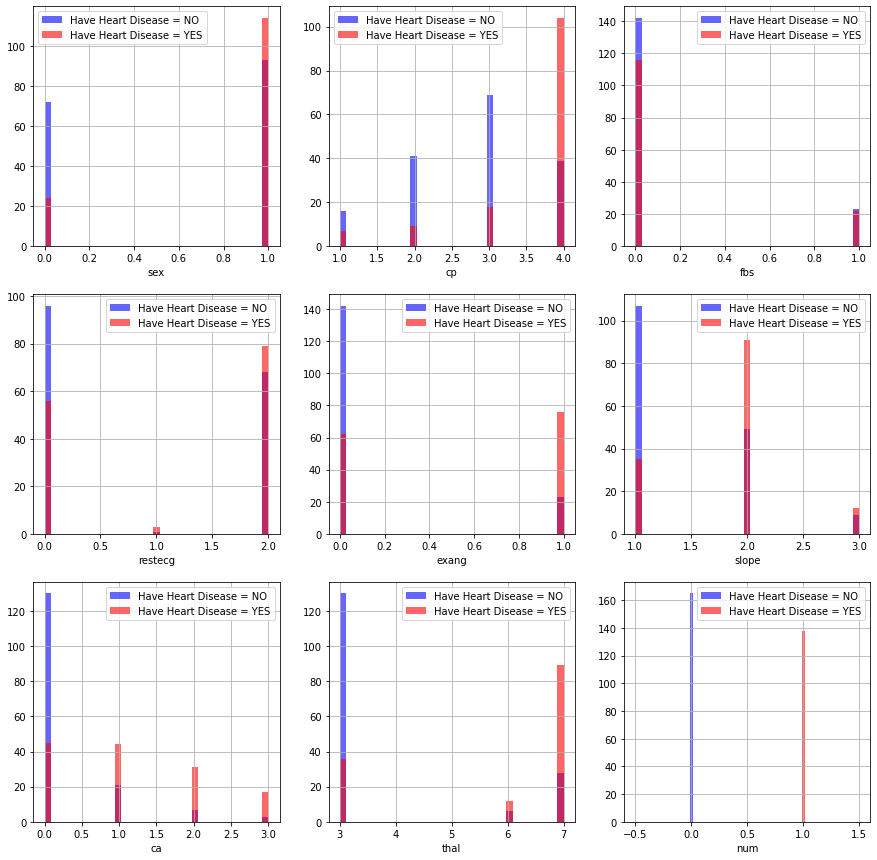

In [5]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    dataset[dataset["num"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    dataset[dataset["num"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

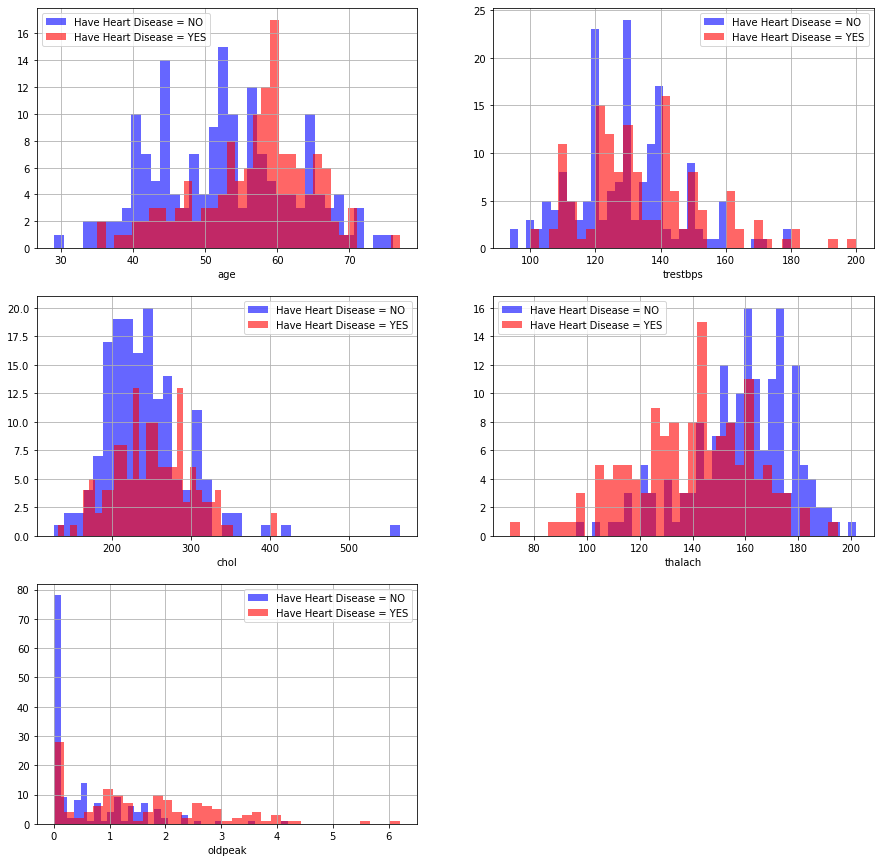

In [6]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    dataset[dataset["num"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    dataset[dataset["num"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

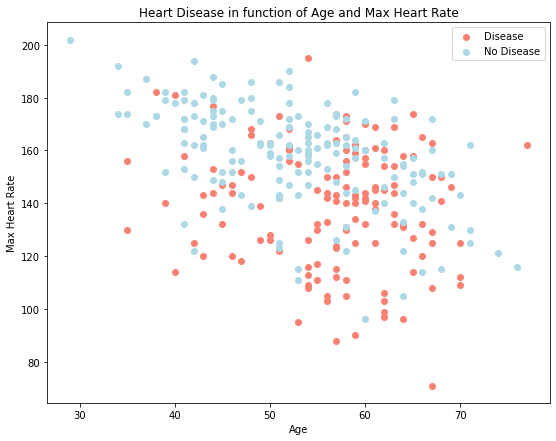

In [7]:
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(dataset.age[dataset.num==1], dataset.thalach[dataset.num==1], c="salmon")

# Scatter with negative examples
plt.scatter(dataset.age[dataset.num==0], dataset.thalach[dataset.num==0], c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

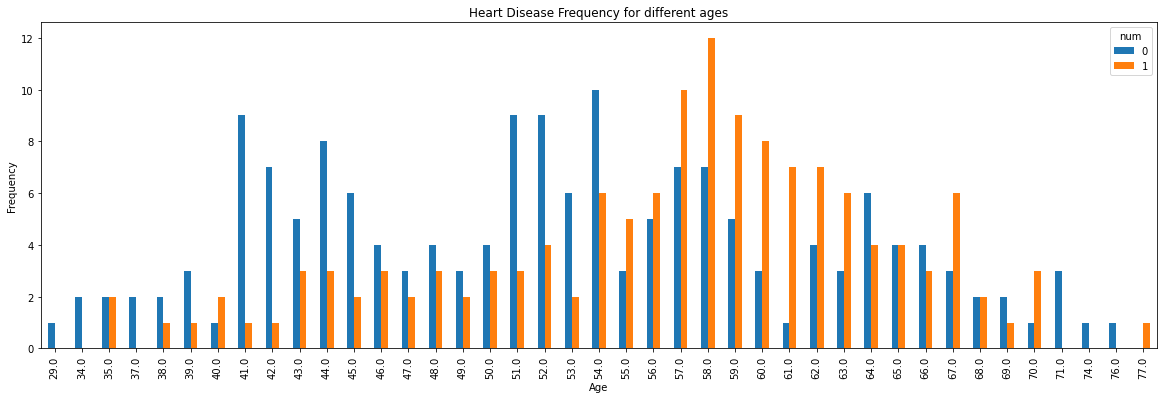

In [8]:
pd.crosstab(dataset.age,dataset.num).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for different ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

(14.5, -0.5)

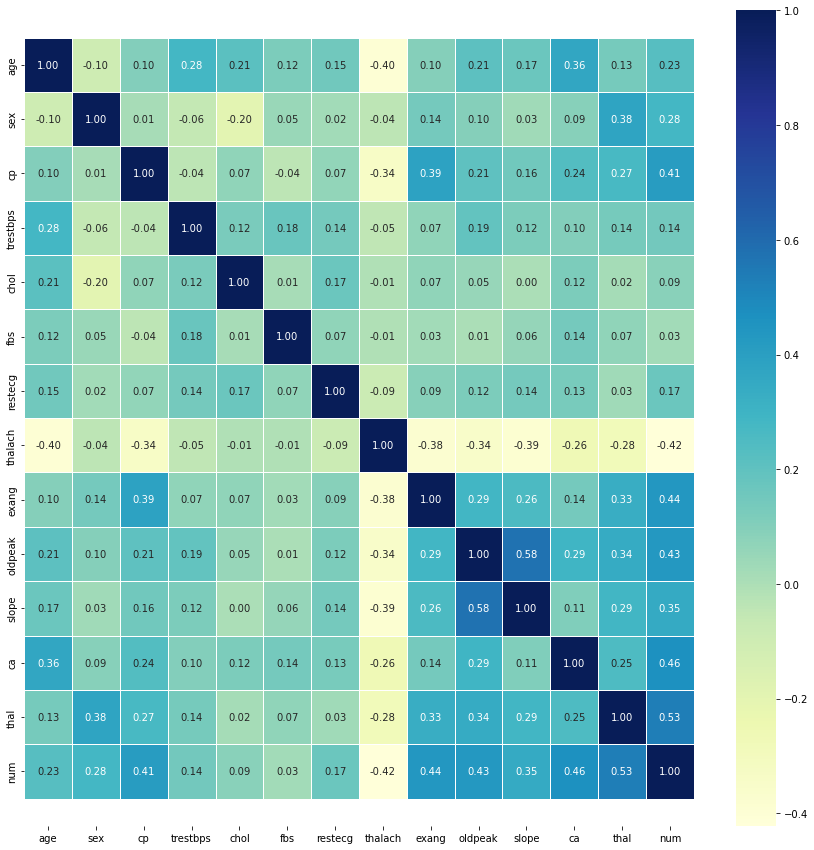

In [9]:
corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [10]:
imputer=imp(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(X[:,11:13])
X[:,11:13]=imputer.transform(X[:,11:13])

In [11]:
### FIT STANDARD RANDOM FOREST CLASSIFIER ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 101)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier =RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(accuracy_score(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))


0.8785046728971962
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        55
           1       0.95      0.79      0.86        52

    accuracy                           0.88       107
   macro avg       0.89      0.88      0.88       107
weighted avg       0.89      0.88      0.88       107



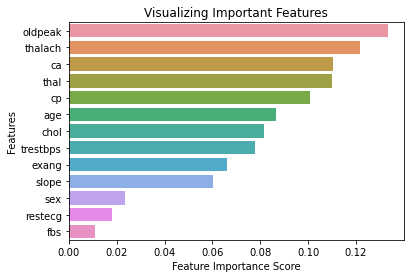

In [12]:
feature_scores = pd.Series(classifier.feature_importances_, index=X1.columns).sort_values(ascending=False)

sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

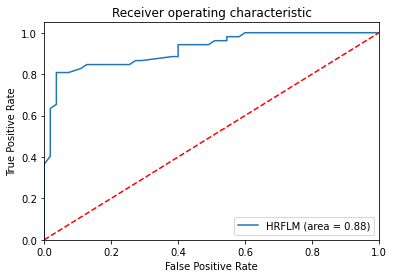

In [13]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='HRFLM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

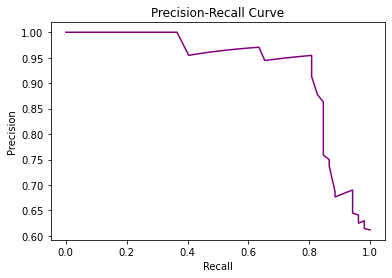

In [14]:
y_score = classifier.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [15]:
class logistic_regr:
    
    def __init__(self):
        self.model = LogisticRegression(penalty="l2",solver='liblinear')
        self.flag = False
        self.flag_y_pred = None

    def fit(self, X, y):
        y_unique = list(set(y))
        if len(y_unique) == 1:
            self.flag = True
            self.flag_y_pred = y_unique[0]
        else:
            self.model.fit(X, y)

    def predict(self, X):
        if self.flag:
            return self.flag_y_pred * np.ones((len(X),), dtype=int)
        else:
            return self.model.predict(X)

    def loss(self, X, y, y_pred):
        return mean_squared_error(y, y_pred)

    def predict_proba(self,X):
        return self.model.predict_proba(X)

In [41]:
esitmators=67
y_pred=[]
n_train_split=int(len(X_train)/esitmators)
inital_train=0
final_train=0


yy_pred=[]
classifier=None

for i in range(1,esitmators+1):

    classifier =logistic_regr()

    final_train=i*n_train_split
    temp_X_train=X_train[inital_train:final_train]
    temp_y_train=y_train[inital_train:final_train]


    L=ModelTree(classifier,max_depth=20, min_samples_leaf=10)

    node=L.fit(temp_X_train,temp_y_train,verbose=False)
    classifier=node["model"]

    y_pred_temp=L.predict(X_test)
    yy_pred.append(y_pred_temp)

for j in range(len(yy_pred[0])):
    curr=[]
    for i in range(len(yy_pred)):
        curr.append(yy_pred[i][j])
    a=curr.count(0)
    b=curr.count(1)
    if a>b:
        y_pred.append(0)
    else:
        y_pred.append(1)

In [42]:
accuracy_score(y_test,y_pred)

0.822429906542056

In [22]:
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        55
           1       0.85      0.77      0.81        52

    accuracy                           0.82       107
   macro avg       0.83      0.82      0.82       107
weighted avg       0.82      0.82      0.82       107



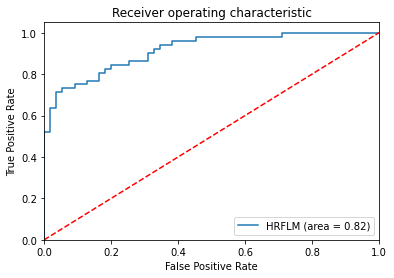

In [19]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='HRFLM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

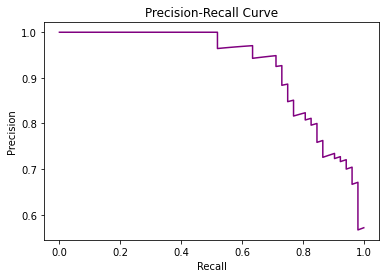

In [20]:
y_score = classifier.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()